# Opracowanie danych pomiarowych Szymon Cogiel 

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# wczytywanie danych
tab1 = pd.read_csv('tabela1.csv')
tab2 = pd.read_csv('fiza_lab_cw00.csv')

# Przeglad danych

In [4]:
tab1

,k,t[s],T[s]
0,20,29.47,1.4735
1,20,29.12,1.4560
2,20,29.19,1.4595
3,20,28.91,1.4455
4,20,29.12,1.4560
5,20,29.03,1.4515
6,20,29.09,1.4545
7,20,29.12,1.4560
8,20,29.13,1.4565
9,20,29.19,1.4595


In [5]:
tab2

,l[mm],k,t[s],T[s],T^2 [s^2],g[m/s^2]
0,93,20,12.59,0.6295,0.396270,9.265124
1,145,20,15.79,0.7895,0.623310,9.183822
2,195,20,17.97,0.8985,0.807302,9.535823
3,235,20,19.66,0.9830,0.966289,9.601090
4,285,20,21.31,1.0655,1.135290,9.910548
5,340,20,23.50,1.1750,1.380625,9.722164
6,375,20,24.19,1.2095,1.462890,10.119971
7,410,20,25.94,1.2970,1.682209,9.621962
8,445,20,26.78,1.3390,1.792921,9.798477
9,470,20,27.56,1.3780,1.898884,9.771453


In [6]:
tab1.describe()

,k,t[s],T[s]
count,10.0,10.000000,10.000000
mean,20.0,29.137000,1.456850
std,0.0,0.142443,0.007122
min,20.0,28.910000,1.445500
25%,20.0,29.097500,1.454875
50%,20.0,29.120000,1.456000
75%,20.0,29.175000,1.458750
max,20.0,29.470000,1.473500


In [7]:
tab2.describe()

,l[mm],k,t[s],T[s],T^2 [s^2],g[m/s^2]
count,15.000000,15.0,15.000000,15.00000,15.000000,15.000000
mean,377.866667,20.0,24.078000,1.20390,1.519446,9.740281
std,156.130836,0.0,5.480007,0.27400,0.609212,0.268917
min,93.000000,20.0,12.590000,0.62950,0.396270,9.183822
25%,260.000000,20.0,20.485000,1.02425,1.050790,9.611526
50%,410.000000,20.0,25.940000,1.29700,1.682209,9.771453
75%,505.000000,20.0,28.515000,1.42575,2.033027,9.912918
max,580.000000,20.0,30.100000,1.50500,2.265025,10.119971


zamiana mm na metry

In [8]:
tab2['l[mm]'] = np.array(tab2['l[mm]']) * 0.001
tab2['l[mm]']

0     0.093
1     0.145
2     0.195
3     0.235
4     0.285
5     0.340
6     0.375
7     0.410
8     0.445
9     0.470
10    0.490
11    0.520
12    0.535
13    0.550
14    0.580
Name: l[mm], dtype: float64

# Bledy grube
Ocen, czy wyniki pomiaru okresu nie zawieraja bledow grubych.

**Nie zostaly zauwazone bledy grube wszystkie pomiary mieszcza sie w normie**

In [9]:
print("Dla tabeli nr 1: ")
print("min[T]: ", tab1['T[s]'].min())
print("max[T]: ", tab1['T[s]'].max())
print("Roznic pomiedzy max i min: ", abs(tab1['T[s]'].min() - tab1['T[s]'].max()))

Dla tabeli nr 1: 
min[T]:  1.4455
max[T]:  1.4735
Roznic pomiedzy max i min:  0.028000000000000025


# Niepewnosc pomiaru okresu typu A

In [10]:
print("Niepewnosc pomiaru okresu typu A wynosi: ", typA(tab1))
T_o = typA(tab1)

Niepewnosc pomiaru okresu typu A wynosi:  0.0006756663377733121


$$ typA = \sqrt{\frac{ \sum(x- \overline{x} )}{n(n - 1)}}$$

# Niepewnosc pomiaru wachadla typu B

In [11]:
delta_l = 0.001 # jednostka m
print("Niepewnosc pomiaru dlugosci wachadla typu B wynosi: ", typB(0.001))

Niepewnosc pomiaru dlugosci wachadla typu B wynosi:  0.0005773502691896258


$$ typB = \frac{\Delta x}{\sqrt{3}}$$

# Przyspieszenie ziemskie

In [12]:
# przyspieszenie zemskie
tab1['g[m/s^2]'] = Earth_acceleration(tab1)
tab1['g[m/s^2]']

0     9.727769
1     9.963015
2     9.915288
3    10.108281
4     9.963015
5    10.024886
6     9.983575
7     9.963015
8     9.956175
9     9.915288
Name: g[m/s^2], dtype: float64

In [14]:
# srednie przyspieszenie ziemskie
g = np.mean(tab1['g[m/s^2]'])
print(g, "[m/s^2]")

9.9520305517101 [m/s^2]


**Nasze srednie przyspieszenie ziemskie wyszlo bardzo realne po zamienieniu jednostek z mm/s^2 na m/s^2 (pomnozyc wynik przez 0.001) jest bliskie 9.81**

$$ g = \frac{4\pi^2l}{T^2}  $$

# Niepewnosc zlozona uc(g)

In [15]:
delta_T = 0.01 # do milisekund 0.01

In [16]:
u_To = T_o / len(tab1['T[s]']) 
print("Niepewnosc zlozona u(g) wynosi: ", u_g(tab1))

Niepewnosc zlozona u(g) wynosi:  0.02073086270527436


$$u_{c}(g) = \sqrt{[\frac{4 \pi^2}{T^2}u(l)]^2 + [-\frac{8\pi^2 l}{T^3}u(T)]^2}$$

# Niepewnosc rozszerzona U(g)

**przyjmujemy k=2**

In [17]:
k = 2
gra = k * u_g(tab1)
print("Niepewnosc rozszerzona U(g) wynosi: ", k * u_g(tab1))

Niepewnosc rozszerzona U(g) wynosi:  0.04146172541054872


$$ U(g) = u_{c}(g)*k$$

# Sprawdzanie zgodnosci pomiarow

In [18]:
g_krk = 9.811 # m/s^2

In [19]:
g_roz = abs(g - g_krk)
g_roz

0.14103055171010048

$$ |g - g_{0}|< granica \space niepewnosci $$

In [20]:
print(g_roz < gra)

False


**Uzyskana wartosc przyspieszenia ziemskiego nie jest zgodna z granicami niepewnosci rozszerzonej**

**Nie uwzglednilem czasu reakcji co najprawdopodobniej sprawilo, ze wartosc przyspieszenia ziemskiego nie jest zgodna z granicami niepewnosci rozszerzonej**

# Wykresy

In [21]:
tab2['g[m/s^2]'] = tab2['g[m/s^2]']*0.001 # zamiana na m/s^2 z mm/s^2

In [22]:
T_2 = 4 * (math.pi ** 2) * tab2['l[mm]']/  tab2['g[m/s^2]']
T_2

0      396.27025
1      623.31025
2      807.30225
3      966.28900
4     1135.29025
5     1380.62500
6     1462.89025
7     1682.20900
8     1792.92100
9     1898.88400
10    1986.69025
11    2079.36400
12    2130.14025
13    2184.48400
14    2265.02500
dtype: float64

In [23]:
X = tab2["T^2 [s^2]"].values
Y = tab2["l[mm]"].values

Text(0, 0.5, 'l[m]')

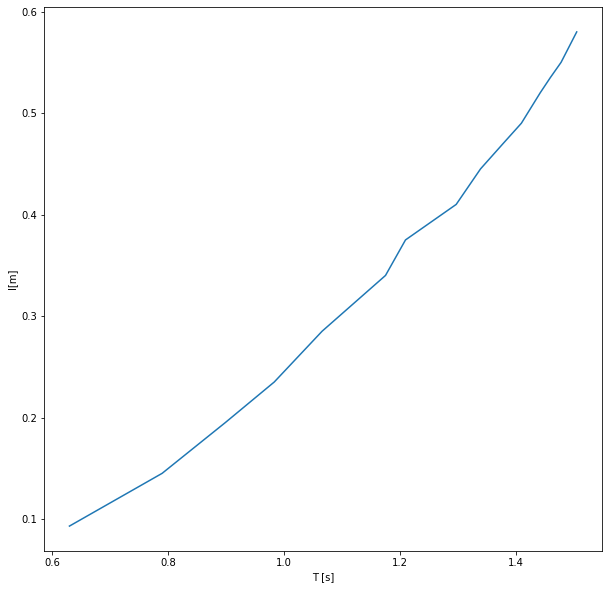

In [31]:
A = tab2["T[s]"].values
B = tab2["l[mm]"].values
plt.plot(A, B)
plt.xlabel("T [s]")
plt.ylabel("l[m]")

In [25]:
plt.rcParams['figure.figsize'] = [10, 10]

Text(0, 0.5, 'l[m]')

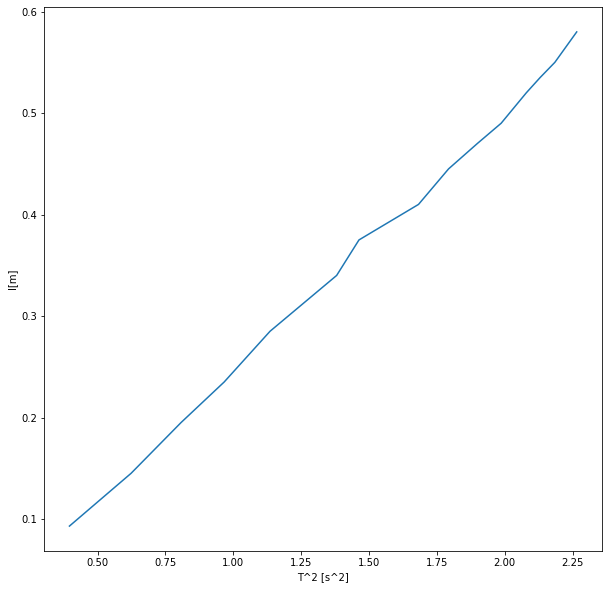

In [26]:
plt.plot(X, Y)
plt.xlabel("T^2 [s^2]")
plt.ylabel("l[m]")

Wykres zaleznosci l i T^2


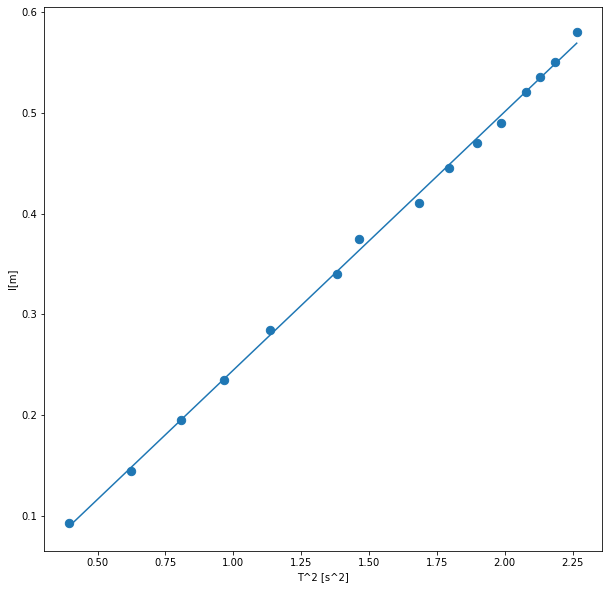

In [27]:
plt.scatter(X, Y, 70)
m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b)
plt.xlabel("T^2 [s^2]")
plt.ylabel("l[m]")
print("Wykres zaleznosci l i T^2")

# Wspolczynnik nachylenia

**Za pomoca formuly LINEST() w excel wyliczylem wspolczynnik a = 4.00434 i u(a) = 0.01862**

In [28]:
a = 4.00434
u_a = 0.01862

Z wzoru $$ a = \frac{4 \pi^2} {g} $$ wiliczamy g $$g = \frac{4 \pi^2} {a}$$

In [29]:
g_ = (4 * math.pi**2) / a
print("Wartosc g wynosi: ", g, "m/s^2")

Wartosc g wynosi:  9.9520305517101 m/s^2


# Niepewnosc u(g)

In [30]:
Ug = (8 * math.pi ** 2 * u_a) / a ** 2
print("Ug = ", Ug)

Ug =  0.09168694836003288


$$U(g) = \frac{8 \pi^2}{a^2} u_{a}$$

# Wnioski

Po analizie naszych wynikow mozemy zauwazyc, ze wykonane pomiary nie zostaly idealnie zmierzone i nie zostal uwzgledniony czas reakcji osoby robiacej pomiary.
Wartosci przyspieszenia ziemskiego odbiegaja nieco od wartosci oczekiwanej natomiast nie sa zle.
Wartoisc ziemskiego g wyniosla 9.95 m/s^2 co odbiega od wartosci krakowskiego przyspieszenia(9.81 m/s^2) o 1.44 %.
Doswiadczenie pokazuje nam, ze za pomoca wachadla matematycznego mozemy mierzyc przyspieszenie ziemskie z calkiem niezlym rezultatem.

In [1]:
# Niepewnosc pomiaru okresu typu A
def typA(df):
    S = np.std((df['T[s]']/ len(df['T[s]'])))
    return S

# Niepewnosc pomiaru dlugosci wachadla typu B
def typB(delta_l = 1):
    u_t = delta_l/np.sqrt(3)
    return u_t

# Przyspieszenie ziemskie
def Earth_acceleration(df, l = 0.535):
    result = np.array([])
    # l = np.array(df['l[mm]'])
    T = np.array(df['T[s]'])
    g = (l / ((T/ (2 * math.pi))**2))
    return g

# Niepewnosc pomiaru okresu typu B
def u_t(delta_T = 0.01):
    u_t =  delta_T / np.sqrt(3)
    return u_t

# Niepewnosc zlozona u(g)
def u_g(df):
    g_l = ((4 * math.pi ** 2 * 0.001) / (1.456850 ** 2)) **2
    g_t = ((-8 * (math.pi ** 2) * 0.535 * 0.00067)/ 1.456850 ** 3)**2
    result = math.sqrt(g_l + g_t)
    return result
    
    
# Niepewnosc zlozona u(g)

def niep_u_g(df):
    lista = []
    for T in np.array(df['T[s]']):
        x = (-8 * (math.pi ** 2))

Szymon Cogiel Geoinformatyka